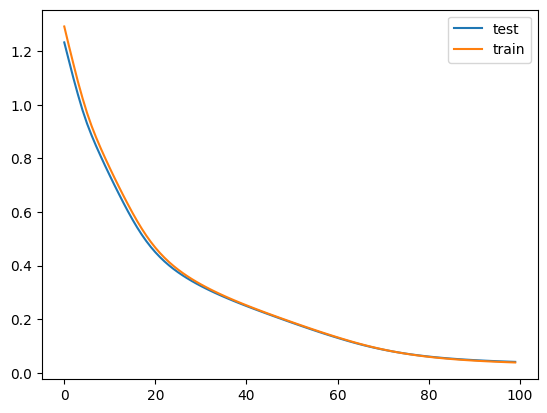

In [96]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import torch.nn as nn
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

X_tr,  X_te, y_tr, y_te = train_test_split(
    torch.from_numpy(X_blob).type(torch.float).to('cuda'),
    torch.from_numpy(y_blob).type(torch.long).to('cuda'),
    test_size=0.2,
)


model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10), 
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8, out_features=6),
    nn.ReLU(),
    nn.Linear(in_features=6, out_features=4)
).to('cuda')

loss_f = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.1)
train_losses, test_losses, epochs = [], [], range(100)

for _ in epochs: 
    model.train()
    preds_tr = model(X_tr)
    loss_tr = loss_f(preds_tr, y_tr)
    optimizer.zero_grad()
    loss_tr.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        preds_te = model(X_te)
        loss_te = loss_f(preds_te, y_te)
        
        train_losses.append(loss_tr.detach().cpu().numpy())
        test_losses.append(loss_te.detach().cpu().numpy())


plt.plot(epochs, test_losses, label = 'test')
plt.plot(epochs, train_losses, label ='train')
plt.legend()

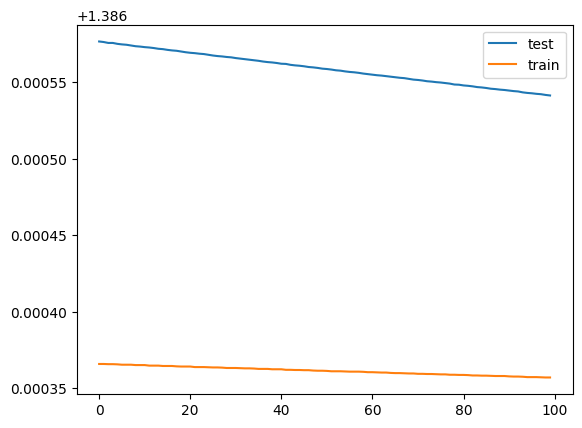

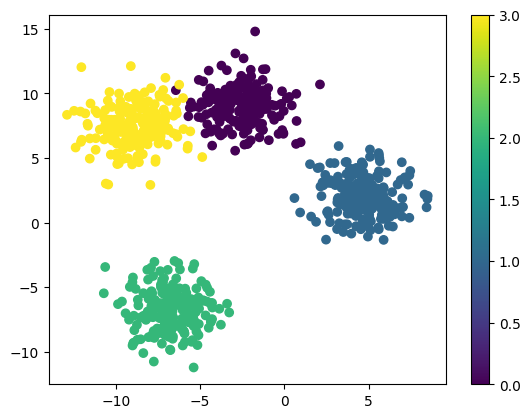

In [78]:
import matplotlib.pyplot as plt

# Extract features
feature1 = X_tr[:, 0].cpu().numpy()
feature2 = X_tr[:, 1].cpu().numpy()

# Extract labels
labels = torch.argmax(y_tr, dim=1).cpu().numpy()

plt.scatter(feature1, feature2, c=labels, cmap='viridis')
plt.colorbar()
plt.show()
